In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import math
import librosa
import pandas as pd

In [ ]:
data = pd.read_csv("/content/data.csv")
data = data.drop(columns=["Unnamed: 0"])
data


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,shuffle=True)


Training score = 0.9894179894179894
Testing score  = 0.8095238095238095


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


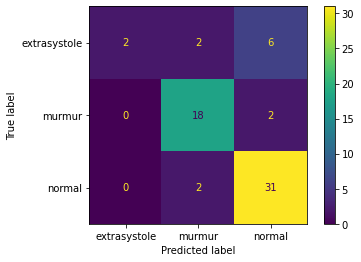

In [ ]:
# RFC Classifier
rfc = RandomForestClassifier(n_estimators=800 , max_depth=7, random_state=0)
rfc.fit(X_train,y_train)
print(f"Training score = {rfc.score(X_train,y_train)}")
print(f"Testing score  = {rfc.score(X_test,y_test)}")
plot_confusion_matrix(rfc, X_test, y_test) 
plt.show()

0.7884714768435699


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


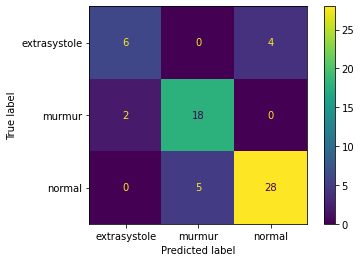

In [ ]:
xgb_cl = xgb.XGBClassifier(max_depth=5,learning_rate=0.01,n_estimators=1000)
xgb_cl.fit(X_train, y_train)
preds = xgb_cl.predict(X_test)
print(f1_score(y_test, preds,average='macro'))
plot_confusion_matrix(xgb_cl, X_test, y_test) 
plt.show()